---

author: Юрій Клебан

---

# Аналіз та обробка статистичних викидів у даних

**Виявлення аномалій** — це сукупність методів, призначених для виявлення незвичайних точок даних.

**Аномалія** - точка даних або набір точок даних, які не мають таку саму структуру та поведінку, що й інші дані.

Аномалії у даних можуть мати різну природу та по різному себе проявляти:

- [x] Точкова аномалія
    * Єдина точка даних
    * Незвично в порівнянні з іншими даними
    
Приклад: одна добова висока температура 41°С серед ряду звичайних весняних днів

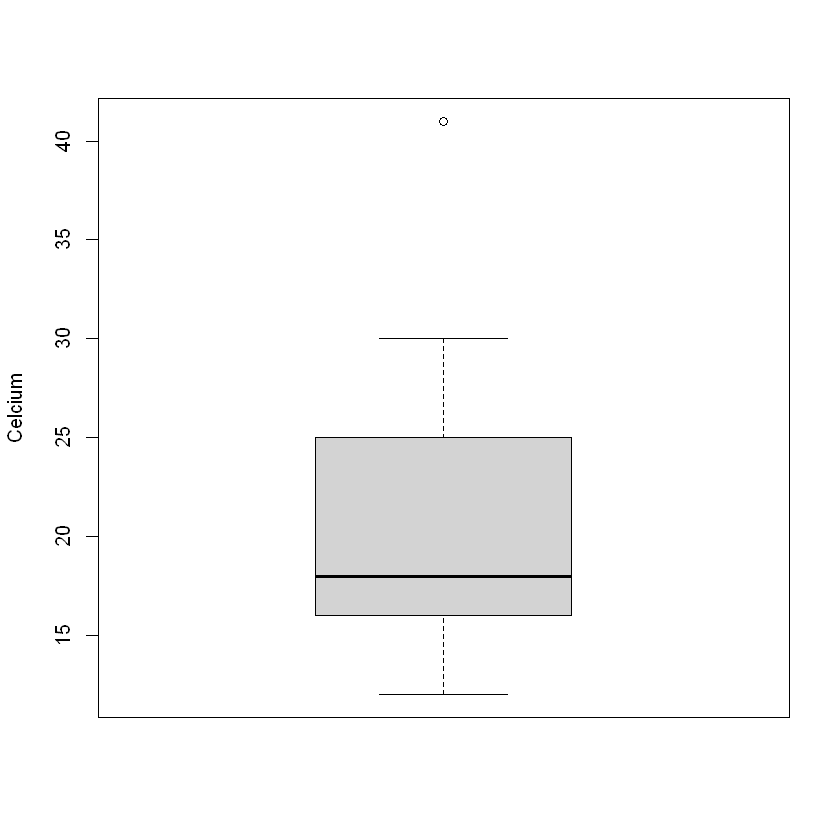

In [97]:
temp <- c(15, 17, 19, 12, 30, 41, 17, 20)
boxplot(temp, ylab = "Celcium")

- [x] Колективна аномалія
    * Аномальна колекція екземплярів даних
    * Незвично, якщо розглядати разом

Опишемо набір даних, до використовуватиметься надалі для прикладів.

`river_eco` - це data.frame, що містить такі три стовпці:
- [x] `index` - цілі числа, що описують порядок спостережень нітратів;
- [x] `nitrate` - місячні концентрації розчинених нітратів у річці;
- [x] `month` - змінна, що містить місяць для кожного спостереження нітратів

Нам потрібно дослідити стовпець `nitrate`, щоб оцінити наявність точкових аномалій у даних.

In [21]:
river_data <- read.csv("data/river_eco.csv")
head(river_data)

,index,nitrate,months
,<int>,<dbl>,<chr>
1,1,1.581,January
2,2,1.323,February
3,3,1.140,March
4,4,1.245,April
5,5,1.072,May
6,6,1.483,June


In [22]:
m_levels <- river_data$months[1:12]
river_data <- river_data |>
    mutate(months = factor(months, levels = m_levels))
head(river_data)

,index,nitrate,months
,<int>,<dbl>,<fct>
1,1,1.581,January
2,2,1.323,February
3,3,1.140,March
4,4,1.245,April
5,5,1.072,May
6,6,1.483,June


Переглянемо описову статистику показника нітрати:

In [23]:
summary(river_data$nitrate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5920  0.9485  1.0680  1.0649  1.1700  1.8970 

Як видно, медіана та середнє відрізняються не дуже.

Далі перевіримо наявність викидів у даних за допомогою `boxplot`:

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

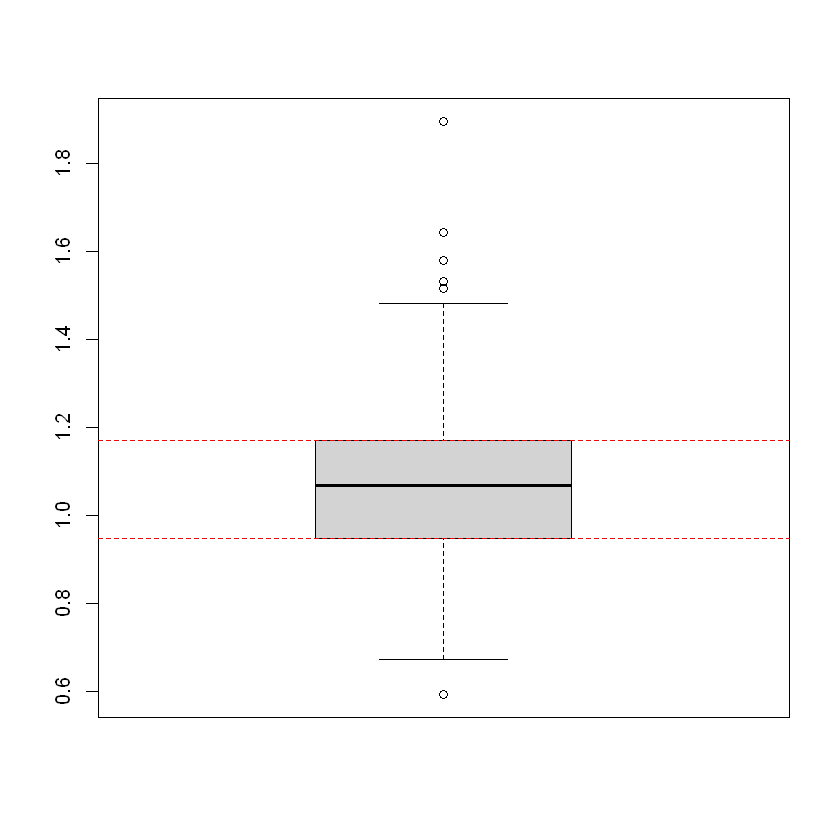

In [24]:
boxplot(river_data$nitrate)
# Додамо лінії 1 та 3 квантилів
abline(h=quantile(river_data$nitrate,0.25),col="red",lty=2)
abline(h=quantile(river_data$nitrate,0.75),col="red",lty=2)

Також виведемо номери рядків спостереженнь, що є викидами:

In [25]:
boxplot.stats(river_data$nitrate)$out

[1] 1.581 1.643 1.533 1.517 1.897 0.592

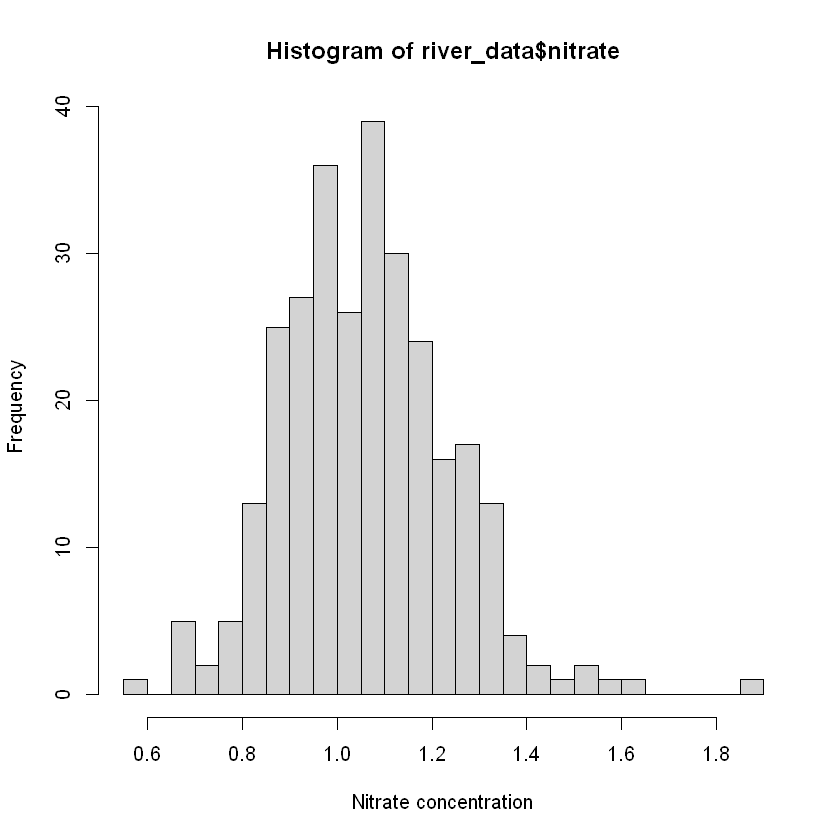

In [26]:
hist(river_data$nitrate, xlab = "Nitrate concentration", breaks = 40)

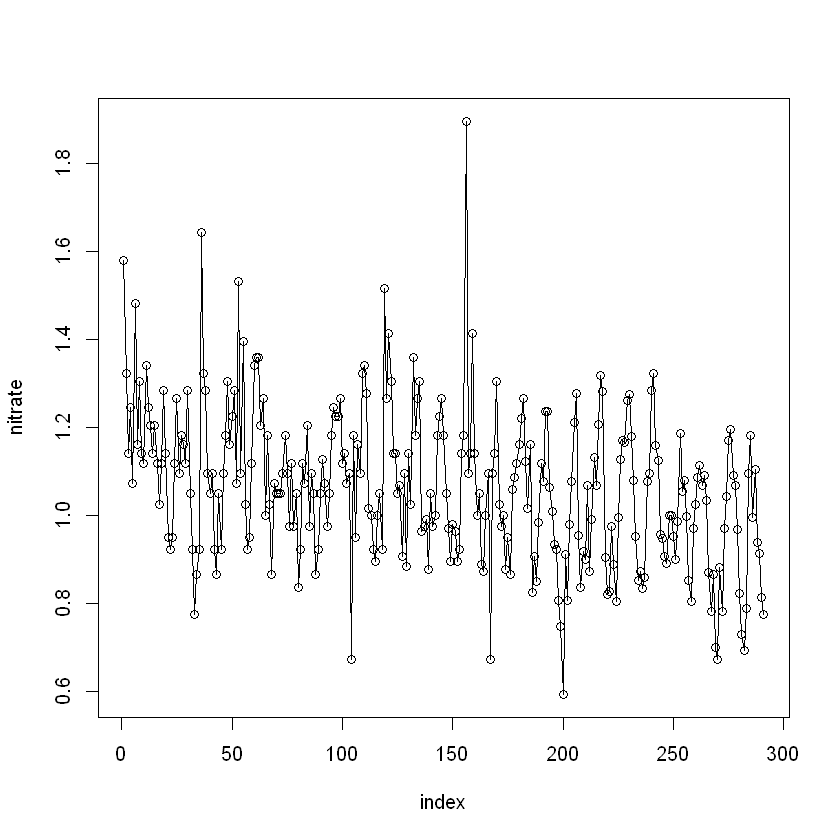

In [27]:
plot(nitrate ~ index, data = river_data, type = "o")

In [28]:
# Середньомісячний вміст нітратів у річці
river_grouped <- river_data |> group_by(months) |> summarise(mean = mean(nitrate))
river_grouped 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

months,mean
<fct>,<dbl>
January,1.2163600
February,1.1838400
March,1.1050400
April,1.0166250
May,0.9978333
June,0.9792083
July,0.9810417
August,0.9380833
September,0.9885833


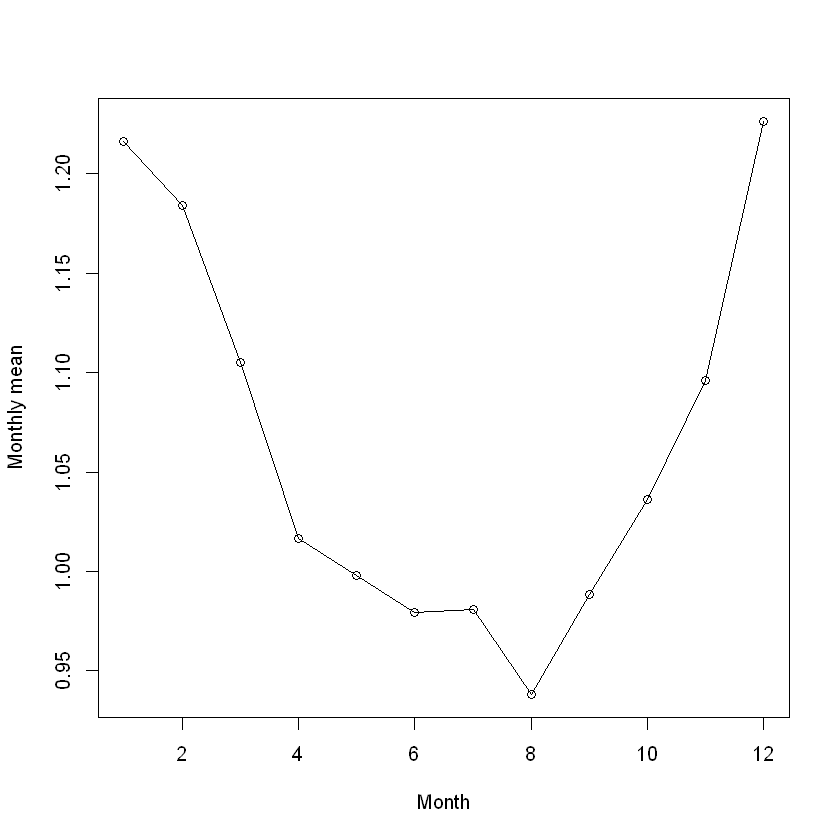

In [29]:
plot(river_grouped$mean, type = "o", xlab = "Month", ylab = "Monthly mean")

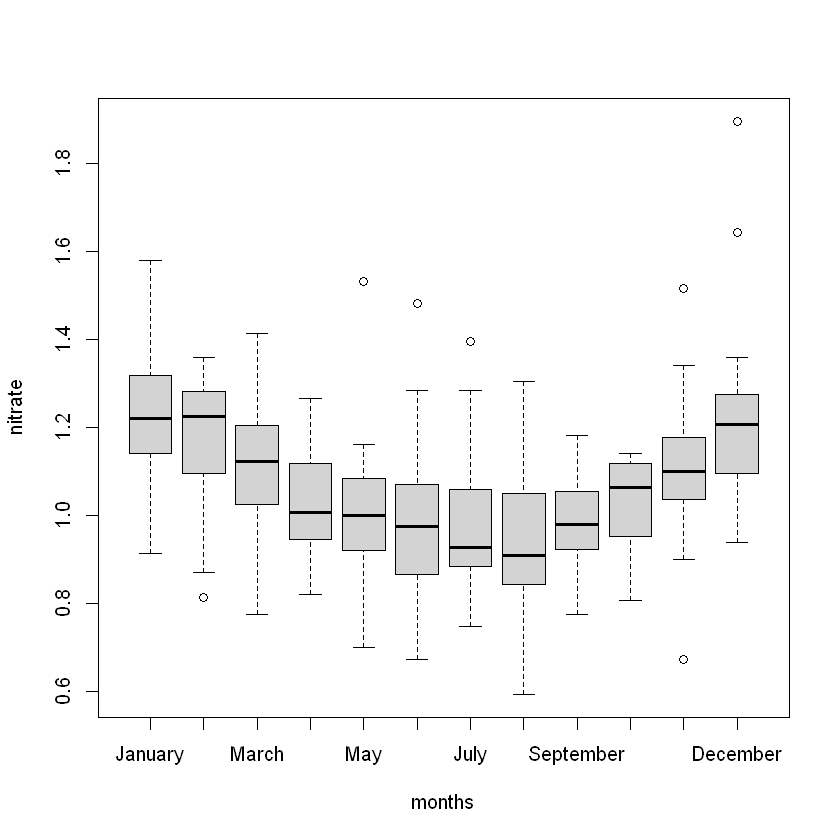

In [30]:
library(dplyr)
boxplot(nitrate ~ months, data = river_data)

Між Q1 та Q3 зосереджено 50% усіх спостережень. Персентиль відображає кількість спостережень, що зосереджені з ним включно.
Нижче розміщено більше інформації для ознайомлення з інформацією про квантилі.

[Quantile. Wikipedia](https://en.wikipedia.org/wiki/Quantile)

![](img/da-data-cleaning/quantiles.png)

Джерело: https://en.wikipedia.org/wiki/Interquartile_range

![](img/da-data-cleaning/quantiles2.png)

Джерело: https://makemeanalyst.com/explore-your-data-range-interquartile-range-and-box-plot/

Визначивши викиди у даних з ними можна здійснити кілька операцій:

1. Заміна на деякі значення (impute)
2. Заміна на границі квантилей

In [31]:
lower_bound <- quantile(river_data$nitrate, 0.025)
lower_bound

upper_bound <- quantile(river_data$nitrate, 0.975)
upper_bound

2.5% 
0.75475

97.5% 
1.4095

In [32]:
outlier_index <- which(river_data$nitrate < lower_bound | river_data$nitrate > upper_bound)
outlier_index

[1]   1   6  36  53 104 119 121 156 159 167 199 200 269 270 281 282

In [33]:
river_data[outlier_index, ]

,index,nitrate,months
,<int>,<dbl>,<fct>
1,1,1.581,January
6,6,1.483,June
36,36,1.643,December
53,53,1.533,May
104,104,0.671,August
119,119,1.517,November
121,121,1.414,January
156,156,1.897,December
159,159,1.414,March


Таким чином, усі значення вище та нище деякого показника можемо замінити на потрібні нам значення, наприклад, середні за поточний місяць.

Здійснимо заміну значень у наборі даних на основі квантилей:

In [34]:
river_data$nitrate_upd <- river_data$nitrate
qnt <- quantile(river_data$nitrate_upd, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(qnt[1], na.rm = T)
river_data$nitrate_upd[river_data$nitrate_upd < (qnt[1] - H)] <- qnt[1]
river_data$nitrate_upd[river_data$nitrate_upd > (qnt[2] + H)] <- qnt[2]

qnt

5%    95% 
0.8050 1.3325

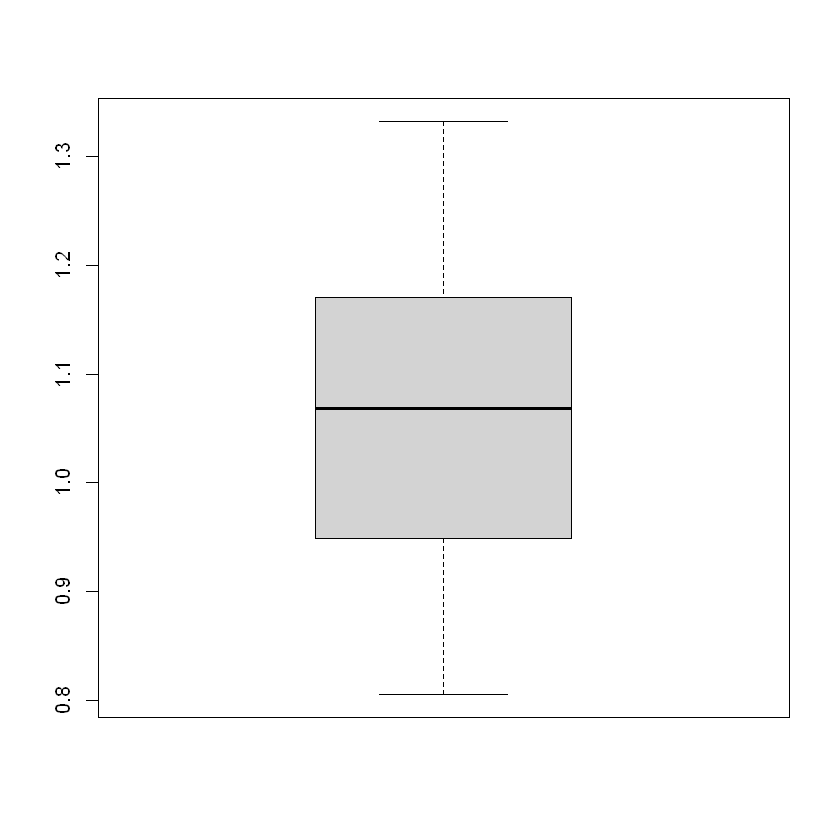

In [35]:
boxplot(river_data$nitrate_upd)

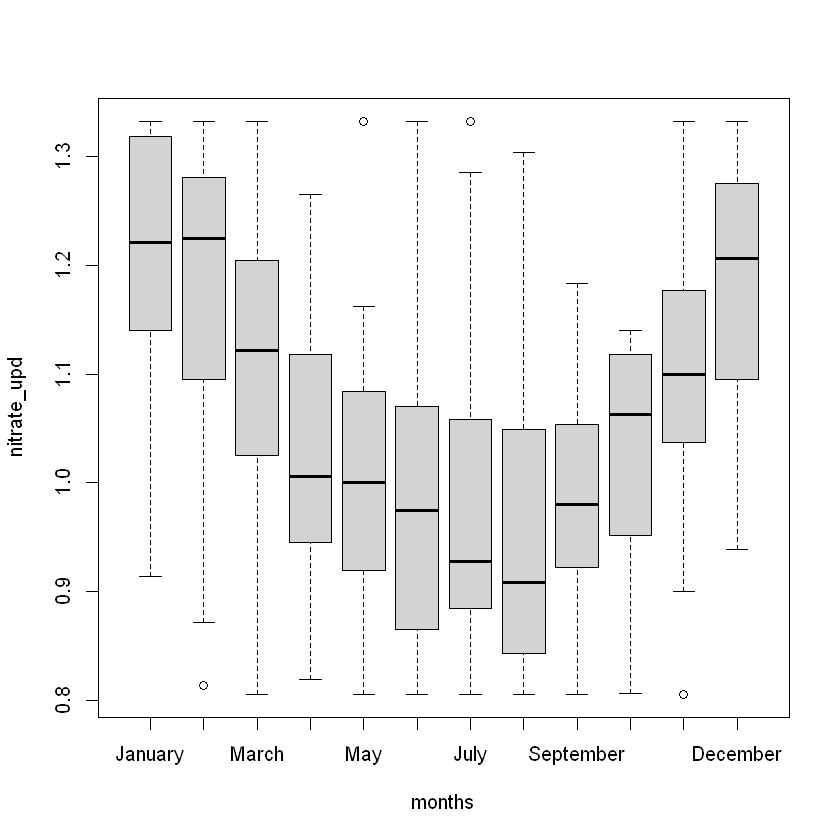

In [36]:
boxplot(nitrate_upd ~ months, data = river_data)

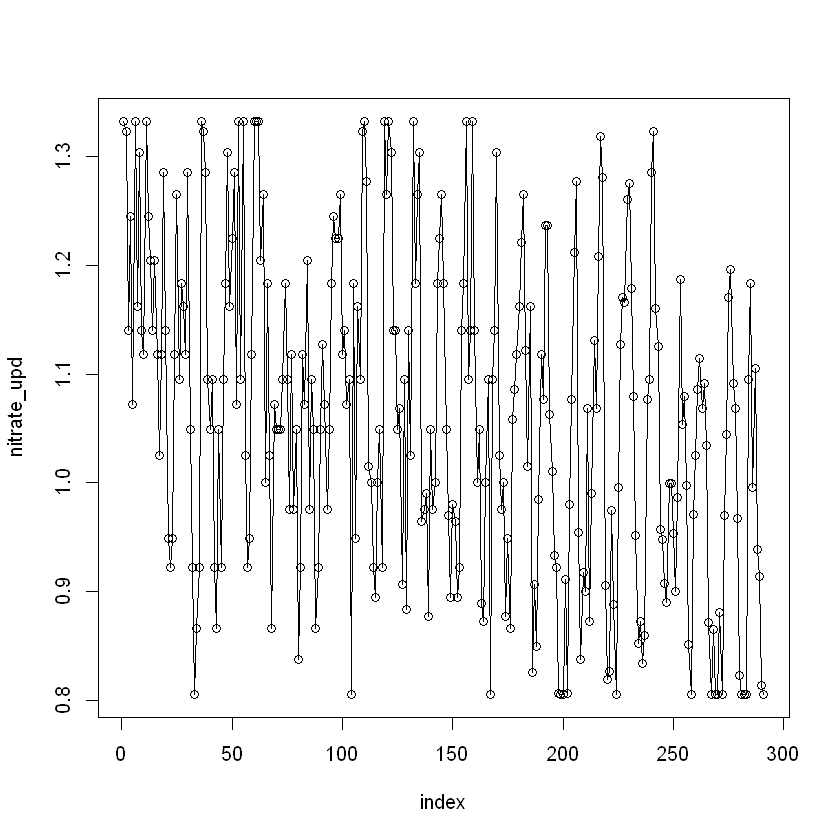

In [37]:
plot(nitrate_upd ~ index, data = river_data, type = "o")

---

## Додаткові прийоми очистки даних <a class="anchor" id="id5"></a>

### Видалення дублікатів

In [114]:
df <- data.frame(X = c(1,1,2,1,3,2,1), Y = c("A", "B", "C", "A", "B", "C", "A"))
df

X,Y
<dbl>,<chr>
1,A
1,B
2,C
1,A
3,B
2,C
1,A


In [115]:
df |> distinct()

X,Y
<dbl>,<chr>
1,A
1,B
2,C
3,B


---

## Набори даних

1. https://github.com/kleban/r-book-published/tree/main/datasets/untitled.csv
2. https://github.com/kleban/r-book-published/tree/main/datasets/badtitled.csv
3. https://github.com/kleban/r-book-published/tree/main/datasets/cleaned_titled.csv
4. https://github.com/kleban/r-book-published/tree/main/datasets/cleaned_titled2.csv
5. https://github.com/kleban/r-book-published/tree/main/datasets/river_eco.csv

---

## Використані та додаткові джерела

1. [KPMG Virtual Internship](https://www.insidesherpa.com/virtual-internships/m7W4GMqeT3bh9Nb2c)
2. [An introduction to data cleaning with R / Edwin de Jonge, Mark van der Loo, 2013](https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf)
3. [Anomaly Detection in R](datacamp.com/courses/anomaly-detection-in-r)
4. [K-nearest Neighbor: The maths behind it, how it works and an example](https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c)
5. [Quantile. Wikipedia](https://en.wikipedia.org/wiki/Quantile)